<a href="https://colab.research.google.com/github/pmpatel-udallas/PChemLab/blob/main/Rotation_2_Calorimetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rotation 2: Calorimetry

This unit will focus on fitting thermograms to a non-linear function.


A common use of least-squares minimization is curve fitting, where one has a parameterized model function meant to explain some phenomena and wants to adjust the numerical values for the model is that it most closely matches some data. With an understanding of the general shapes of mathematical functions, one can numerically analyze a set of data through treating a set of data
collected at 1 sample per second with a more precise analytical function that can populate data at 1000 samples per second for example. With an analytic function that can model your data, you can more easily extrapolate information through calculus (e.g., extrema, inflection points). In Python, the scipy and lmfit packages (among others) have the capability for curve fitting. Another aspect of curve fitting that is useful for chemistry is when considering peak analysis in spectroscopy or chromatography. One can use as a linear combination of an arbitrary number of Gaussian and/or Lorentzian functions (two types of functions suited for peak fitting) to model a spectra/chromatogram and identify key characteristics or features such as peak location, area under the curve, and subtle features where more than one feature is present in a single peak.

## 1. Import Packages

In [ ]:
# Import standard packages
import numpy as np # Import numerical analysis
import os,sys,re # Import regex
import pandas as pd # DataFrame analysis

#Spectra fitting - scipy
from scipy import interpolate
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import skewnorm

# Plotting
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 24})
matplotlib.rcParams.update({'font.family': 'Sans'})
matplotlib.rcParams.update({'mathtext.fontset' : 'custom'})

# Insert a progress bar to show the progress of the script
!jupyter nbextension enable --py widgetsnbextension
from tqdm.notebook import tqdm, tnrange, trange

# Run the next two lines if you are linking your Google Drive
#from google.colab import drive
#drive.mount('/content/drive')


## 1.1 LMFIT
In this lab exercise, we will use the lmfit package since it can provide confidence intervals and the standard error of the fitting variables upon request rather than using statistical analysis to derive the same values. To use the lmfit package to analyze your thermograms, do the following on the Colab Notebook you are building for this lab.

If you have lmfit installed via a version of Python downloaded on your computer, then do not include the "!pip install lmfit" line.

In [ ]:
!pip install lmfit
import lmfit
from lmfit import Model

## 1.2. Import Data

In [ ]:
# Import your individual thermograms




## 1.3 Define fitting functions

The general form of a line is

$$
y = mx+b
$$

The general form of a logistic function is

$$
f(x) = \dfrac{L}{1+e^{-k(x-x_0)}}+B
$$


**Define the functions in the cell below.** All the variables are already included in the function.

In [ ]:
# Define the fitting functions for the thermogram
def line(x, m, b):
  ''' Define a function for a line '''
  y = # You code this
  return y

def logistic(x, L ,x0, k, B):
  ''' Define a logistic function '''
  y = # You code this
  return y

## 2 Calculate $\Delta$T

Typically, in a calorimetry experiment $\Delta T$ must be determined with care for several reasons. The chemical reaction takes place in a finite volume ($\sim$120 mL), so the temperature of the surroundings is coming to equilibrium as the reaction proceeds to completion. Thus, there may be a temporary non-uniformity in temperature while the temperature is monitored in only one location in the solution. Stirring greatly helps maintain uniformity of temperature, but in the crucial first few fractions of a second after the reactants are mixed, the instantaneous change in temperature may not be detected. But, stirring may also introduce an endothermic “leak” by imparting some frictional heat into the surroundings. Additionally, the calorimeter may not be fully insulated from its surroundings, introducing an exothermic “leak” as the temperature of the water in the Dewar flask exceeds the temperature outside the flask. In the apparatus used for this laboratory, the Dewar flask is very well insulated but as soon as the mixture reaches a peak temperature you may see it begin to return slowly to ambient temperature. These issues do not pose an insurmountable barrier to getting the right $\Delta T$, but some interpretation of the “thermogram”, the temperature vs. time trace, is required.

Because of molecular diffusion, when two liquids are mixed together to complete a chemical reaction, the change in temperature from the $\Delta H_\text{rxn}$ is not instantaneous. In a perfectly isolated calorimeter, both the pre-reaction temperature ($T_i$) and post-reaction temperature ($T_f$) would be flat with respect to time (no additional endothermic or exothermic “leaks”), then $\Delta T$ could be measured directly as $T_f - T_i$ once $T_f$ stabilizes. In reality, the calorimeter is not perfectly isolated calorimeter for reasons stated above. Both the pre-reaction temperature and post-reaction temperature may have some drift in temperature that must be accounted for when determining $\Delta T$. There is no universally established methodology for finding the equivalent instantaneous mixing time ($t_{MIX}$), the point on the thermogram where $\Delta T$ can be estimated from the extrapolated pre-reaction and post-reaction trend lines.

**The figure below shows an example of how the code will be used with the specific variables defined in the lab manual to calculate $t_{MIX}$. Use the code blocks below to calculate $\Delta T$ with each method.**

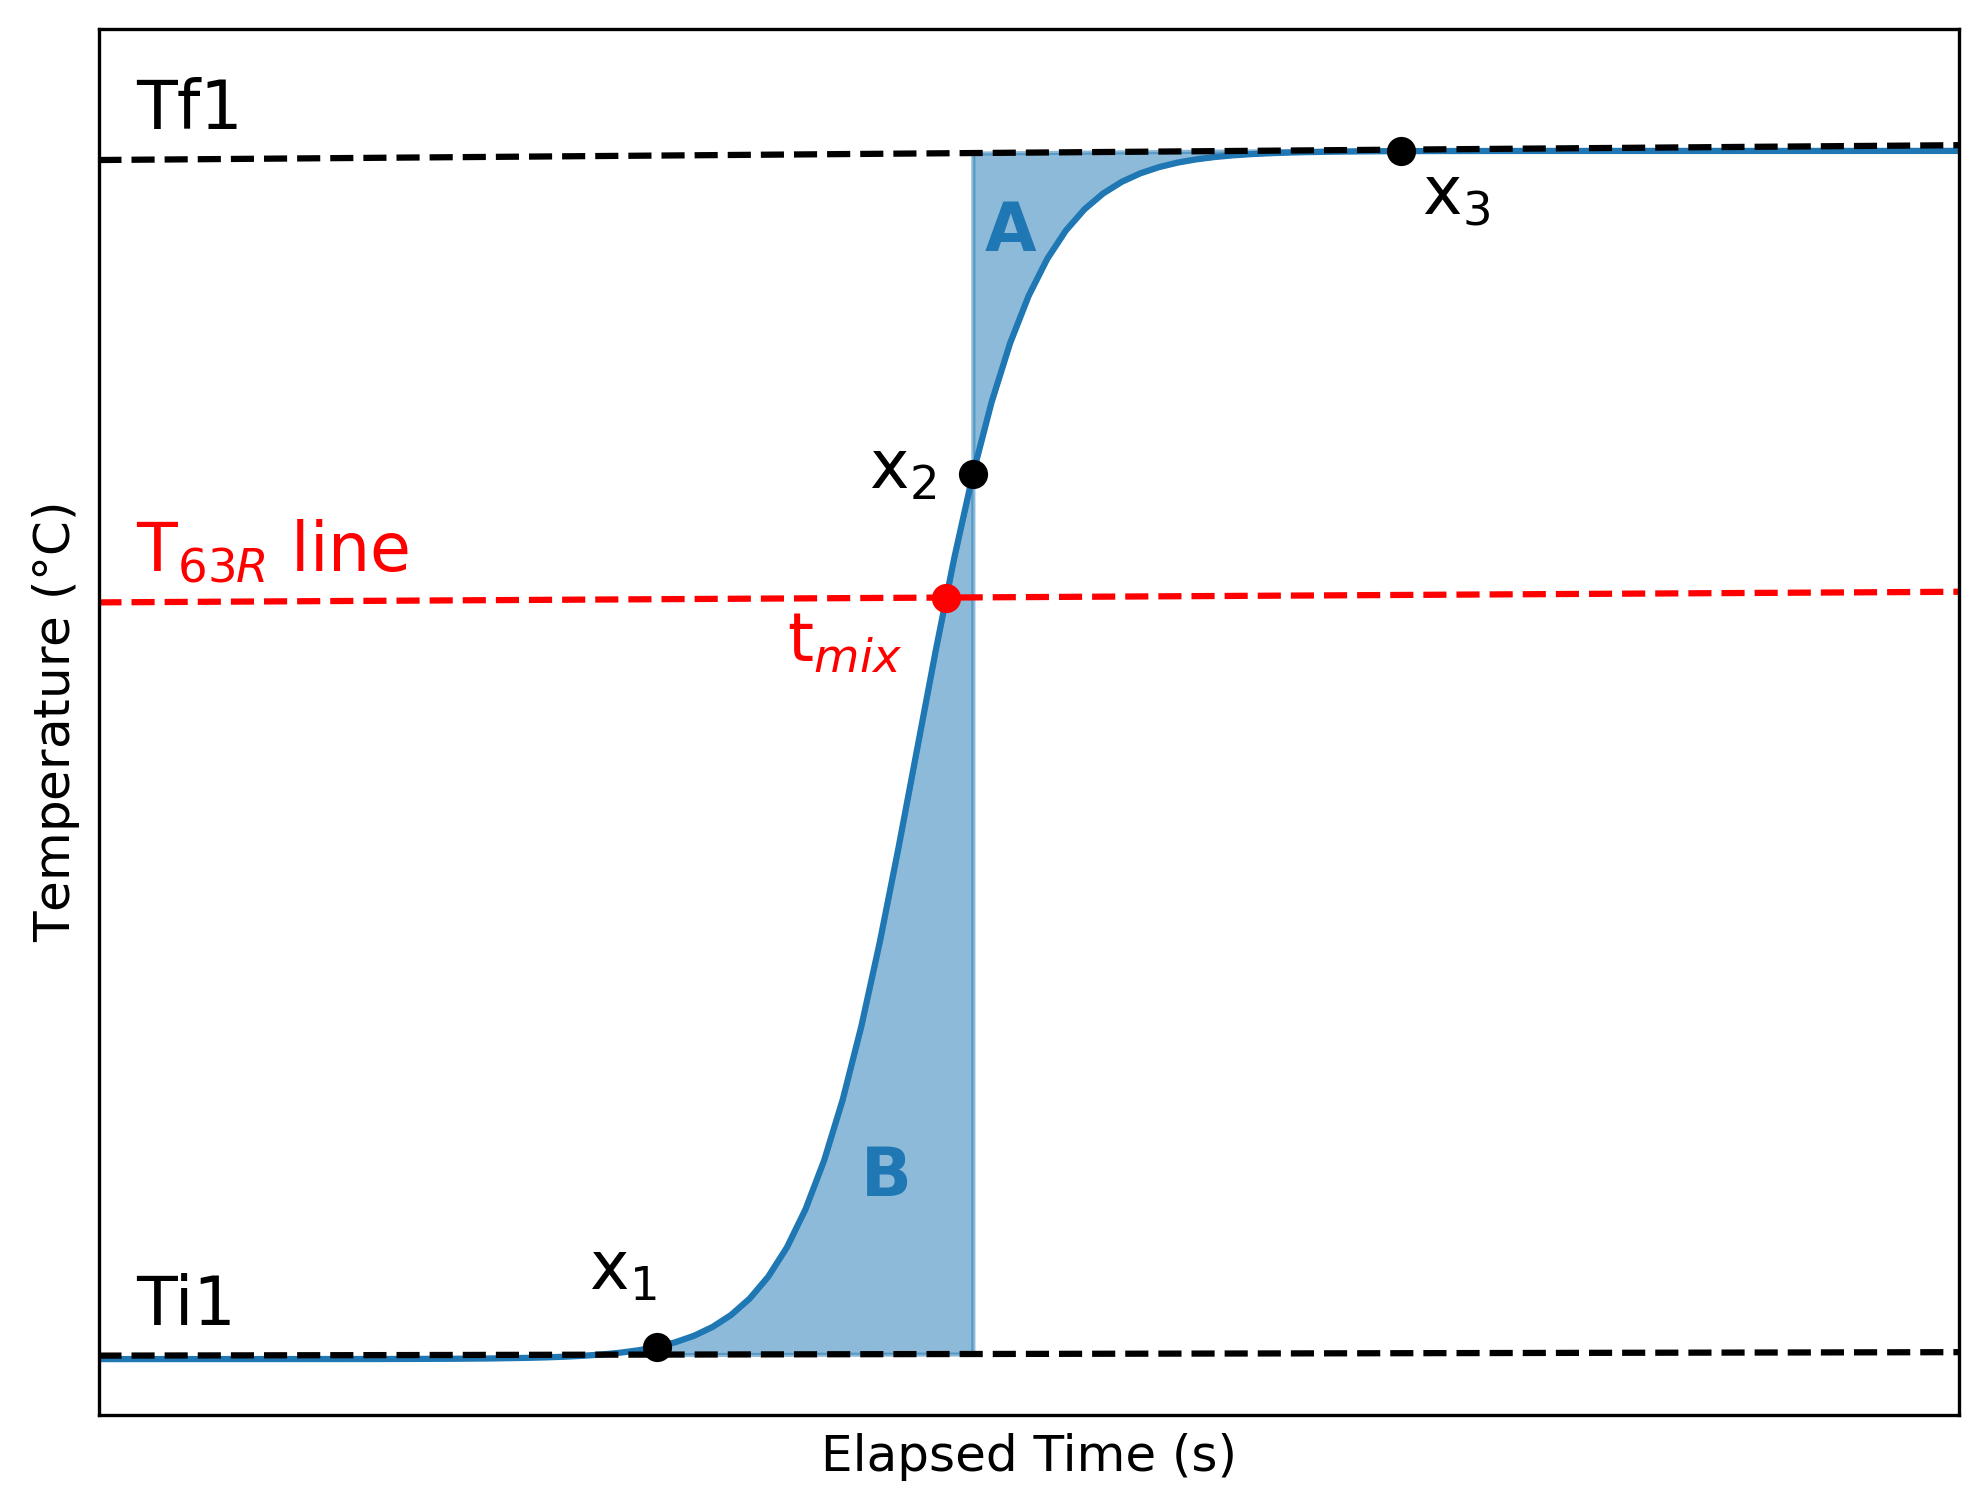

You need to select which x values (xdata) and y values (ydata) will represent the linear lines Ti1 (pre-reaction, initial temperature) and Tf1 (post-reaction, final temperature).

Within your dataframe that contains your thermogram data, define the points that will be used to fit the linear line.

xdata, ydata will be specific data points that you want to use to define the linear line. xdata2, ydata2 will work the same way.

Look up ways to isolate portions of a dataframe (.loc, .iloc, .filter, etc.)


In [ ]:
# Define the lines Ti1 and Tf1 using scipy.stats.linregress(xdata, ydata)

xdata=
ydata=

xdata2=
ydata2=

Ti1=scipy.stats.linregress(xdata,ydata)
Tf1=scipy.stats.linregress(xdata2,ydata2)


# The results of Ti1 and Tf1 will contain the slope, intercept, and errors
# as we've seen in the previous labs.
# To call the slope, use Ti1.slope (as we've seen before)
Tf1

## 2.1 T$_{.63R}$

T$_{.63R}$ is the temperature that is 63\% of $\Delta T$ above $T_i$.

\begin{equation}
	T_{.63R}=T_i + (\Delta T \times 0.63)
\end{equation}

$\Delta T$ is the difference between the extrapolated pre-reaction trend and the extrapolated post-reaction trend on a vertical line at the equivalent instantaneous mixing time **t$_{MIX}$**), which intersects the thermogram at $T_{.63R}$. This analysis should be done numerically, fitting both the pre-reaction and post reaction data to a straight line.

By minimizing the difference between the intersection between the $T_{.63R}$ line (the line that sits at 63\% between $T_i$ and $T_f$)and the thermogram, t$_\text{MIX}$, which intersects the thermogram at $T_{.63R}$, can be found and can then be extrapolated to solve for $\Delta T$.

**Interpret the diff1 function. What does it do? What are the steps involved?**

In [ ]:
# Using Method 2.1 to calculate Delta T (T63R)

def diff1(x2):

  # Define the points along the best fit lines and the thermogram
  yi=line(x2,Ti1.slope,Ti1.intercept)
  yf=line(x2,Tf1.slope,Tf1.intercept)
  y=logistic(x2,L,x0,k,B)


  # Calculate the ratio between the y values of the best fit lines
  # and the analytical function for the thermogram (You will code this)
  dy=


  # Print the input and output of the diff1 function, i.e., the x and f(x).
  # What do you think this function is doing?
  print(x2,np.abs(dy-0.63))
  return np.abs(dy-0.63)


# Find where T63R intersects the thermogram through an optimization procedure.
# Set the bounds to those of the curve of the thermogram (x1 and x3).
g=scipy.optimize.minimize_scalar(diff1,bounds=(x1,x3))
print("tmix T63R:",g.x)

## 2.2 Equivalent Areas

Define the integrals and then calculate the difference between the two areas

In [ ]:
# Calculate the analytical logistic function with best fit parameters
# Prints out the statistics of the fit, including uncertainties

from scipy.integrate import quad

# Fit the data with initial conditions
gmodel1 = Model(logistic)

# Pick initial conditions for ydata, xdata, and fitting parameters
# x0 and B should be changed based on your information
# x0 is the time you hit the plunger
# B is the temperature you set the y axis to
result1 = gmodel1.fit(ydata, x=xdata, L=2, x0=90, k=2, B=23)

# Return the best fit parameters
L=result1.params['L'].value
x0=result1.params['x0'].value
k=result1.params['k'].value
B=result1.params['B'].value

# Print the standard statistics of the fitting
print(result1.fit_report())

# Print the confidence interval values for each parameter
print(result1.ci_report())

**Interpret the diff2 function to calculate the equivalent areas. What does it do? What are the steps involved?**

**What are the roles of x1, x2, and x3**

In [ ]:
# The best fit parameters you defined earlier will carry over into these lines
def diff2(x2):

  # Set integration limits (time values) to evaluate the areas (You will code this)
  # These are numerical values
  x1=
  x3=

  # Calculate area B (Logistic Curve - Temp Init Line)
  Thermo_init=scipy.integrate.quad(logistic, x1, x2, args=(L, x0, k, B))[0]
  Line_init=scipy.integrate.quad(line, x1, x2, args=(Ti1.slope, Ti1.intercept))[0]

  # Calculate area A (Temp final line - Logistic Curve)
  Thermo_final=scipy.integrate.quad(logistic, x2, x3, args=(L, x0, k, B))[0]
  Line_final=scipy.integrate.quad(line, x2, x3, args=(Tf1.slope, Tf1.intercept))[0]

  # You have the areas under the respective curves, how will you calculate the area
  # between two curves?

  # Calculate the areas (You will code this)
  area_A=
  area_B=

  # Once you calculate area_A and area_B, then calculate the absolute value of
  # the difference between areas (You will code this)
  area_diff =

  # Print the output from the function
  print(x2, area_diff)

  # Return the absolute value of the difference between areas (You will code this)
  return


# Calls the minimize scalar function, which finds the minimum through optimization
h = scipy.optimize.minimize_scalar(diff2)
# Print the output x value for t_mix.
print('tmix area:',h.x)

If you want to visualze the diff1 or diff2 functions, run the following

In [ ]:
# Create a linspace from x1 to x3 with 100 points with the values of x1 and x3 you chose.
# You will need to separately define them here or just insert the values you used.

x_all=np.linspace(x1, x3, 100)
diff_data=[]
for i in range(len(x_all)):
  diff_data.append(diff1(x_all[i]))

# Plot the diff function as a function of time
plt.plot(x_all,diff_data)

# Include the optimized minimum result
plt.plot(g.x,diff1(g.x),'ko')
plt.show()

Once you have $\Delta T$ computed for one trial, repeat for the other trials to compute the $\Delta H$ term you are targeting for the lab ($\Delta H_{NEUT}$ or $\Delta H_{SOL}$)



In [ ]:
# Use arithmetic here (or in Excel) to calculate Delta H for your trials
# This will be used to calculate the heat of reaction (can be used for second
# solution calorimetry experiment with NaCl and CaCl2)




In [ ]:
# For Lab 2 (Plot of Heat of Reaction vs moles NaOH for determining
# Delta H of neutralization)



